In [1]:
F = 5
L = 9

Exercise 1

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


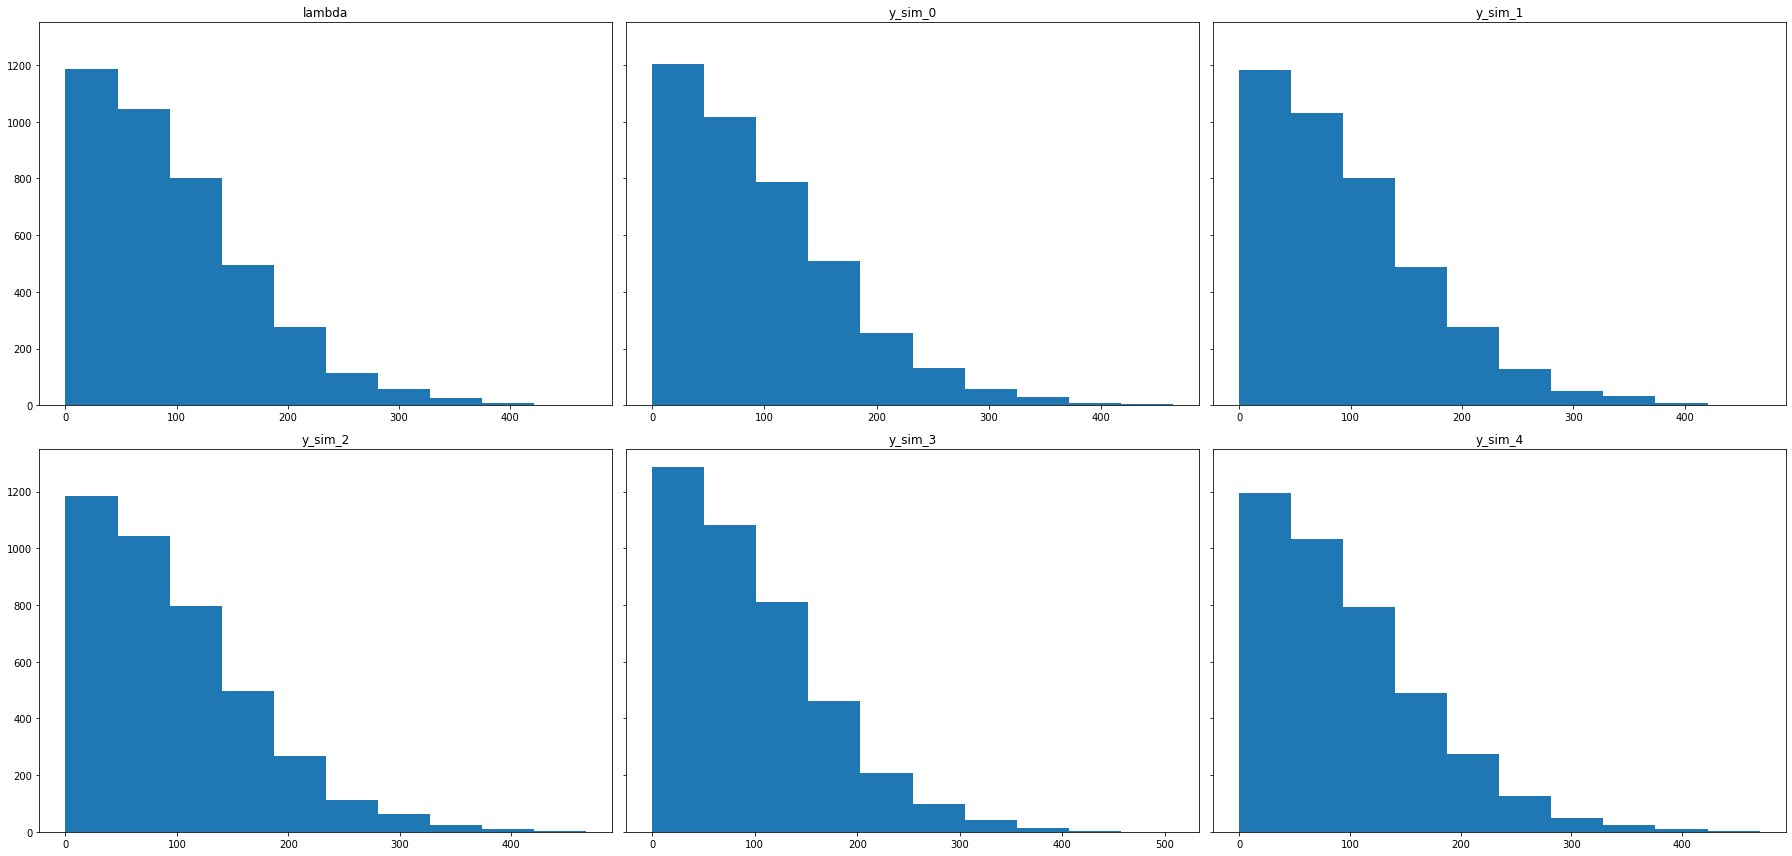

In [2]:
import cmdstanpy
import matplotlib.pyplot as plt
import pandas as pd

model = cmdstanpy.CmdStanModel(stan_file='Data/code_1.stan')
sample = model.sample({'M': F})
stan_data = pd.DataFrame()
stan_data['lambda'] = sample.stan_variable('lambda')
y_sim = sample.stan_variable('y_sim')
for i in range(F):
    stan_data[f'y_sim_{i}'] = y_sim[:, i]
    
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
for idx, series in enumerate(stan_data):
    axs[int((idx)/3),(idx)%3].hist(stan_data[series])
    axs[int((idx)/3),(idx)%3].set_title(f'{series}')

Exercise 2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


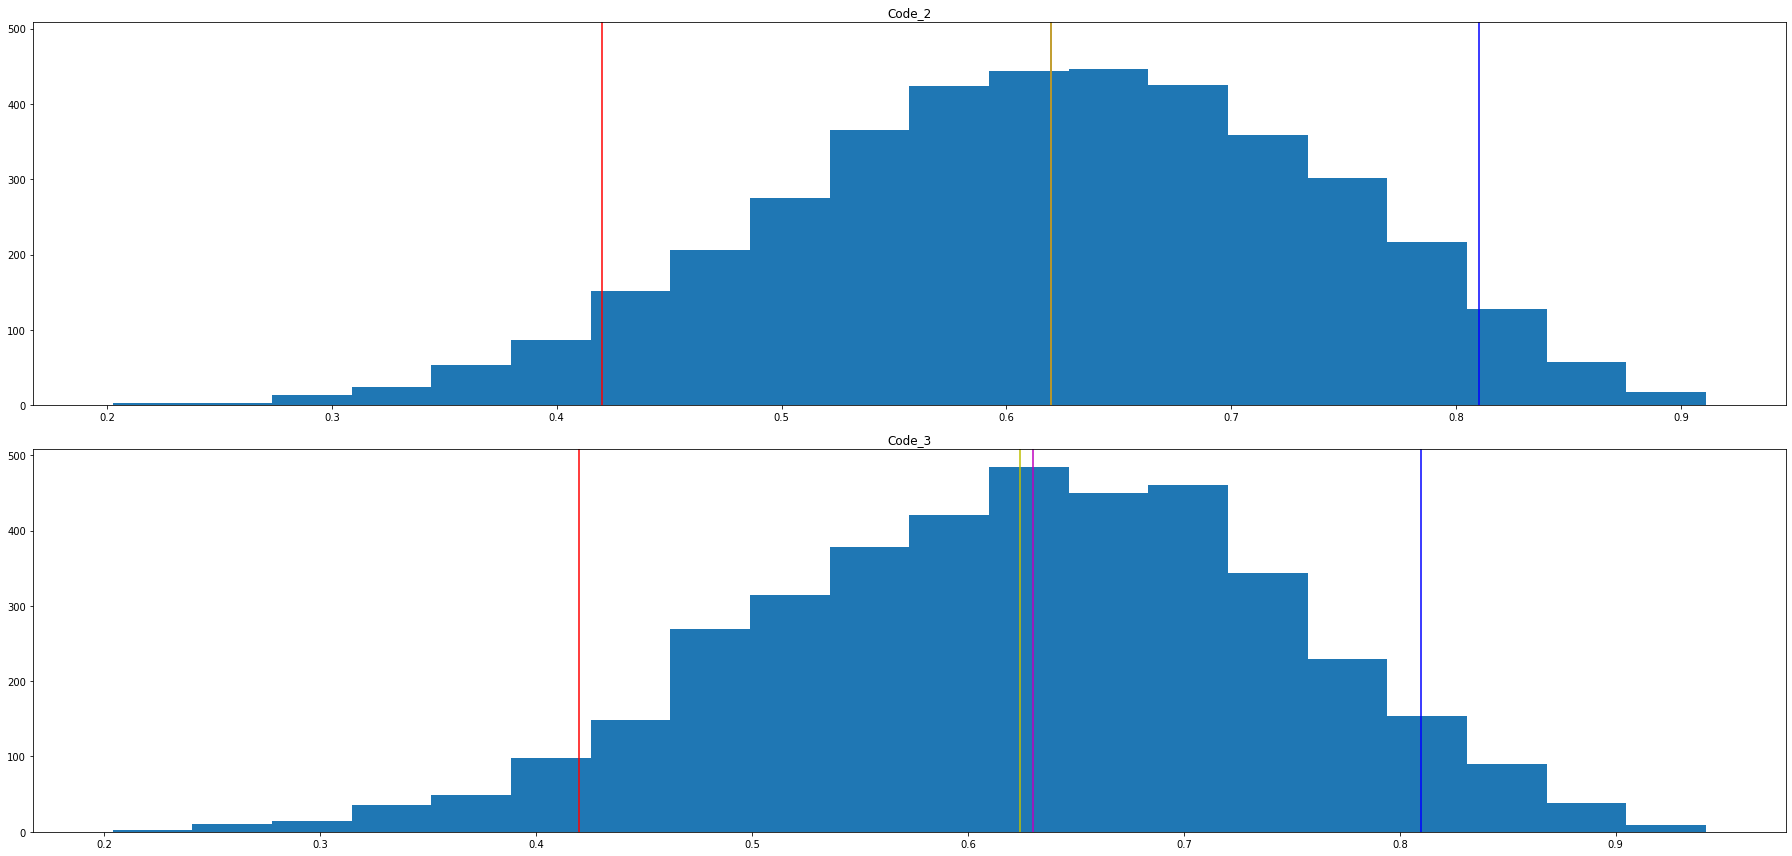

In [3]:
data = {'N': 14, 'y': [0]*5 + [1]*9}

model_1 = cmdstanpy.CmdStanModel(stan_file='Data/code_2.stan')
sample_1 = model_1.sample(data)
theta_1 = sample_1.stan_variable('theta') 
summary_1 = sample_1.summary()

model_2 = cmdstanpy.CmdStanModel(stan_file='Data/code_3.stan')
sample_2 = model_2.sample(data)
theta_2 = sample_2.stan_variable('theta') 
summary_2 = sample_2.summary()

fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
axs[0].hist(theta_1, bins=20)
axs[0].set_title('Code_2')
axs[0].axvline(summary_1['5%']['theta'], color='r')
axs[0].axvline(summary_1['50%']['theta'], color='m')
axs[0].axvline(summary_1['95%']['theta'], color='b')
axs[0].axvline(theta_1.mean(), color='y')
axs[1].hist(theta_2, bins=20)
axs[1].set_title('Code_3')
axs[1].axvline(summary_2['5%']['theta'], color='r')
axs[1].axvline(summary_2['50%']['theta'], color='m')
axs[1].axvline(summary_2['95%']['theta'], color='b')
axs[1].axvline(theta_2.mean(), color='y')

Excercise 3

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


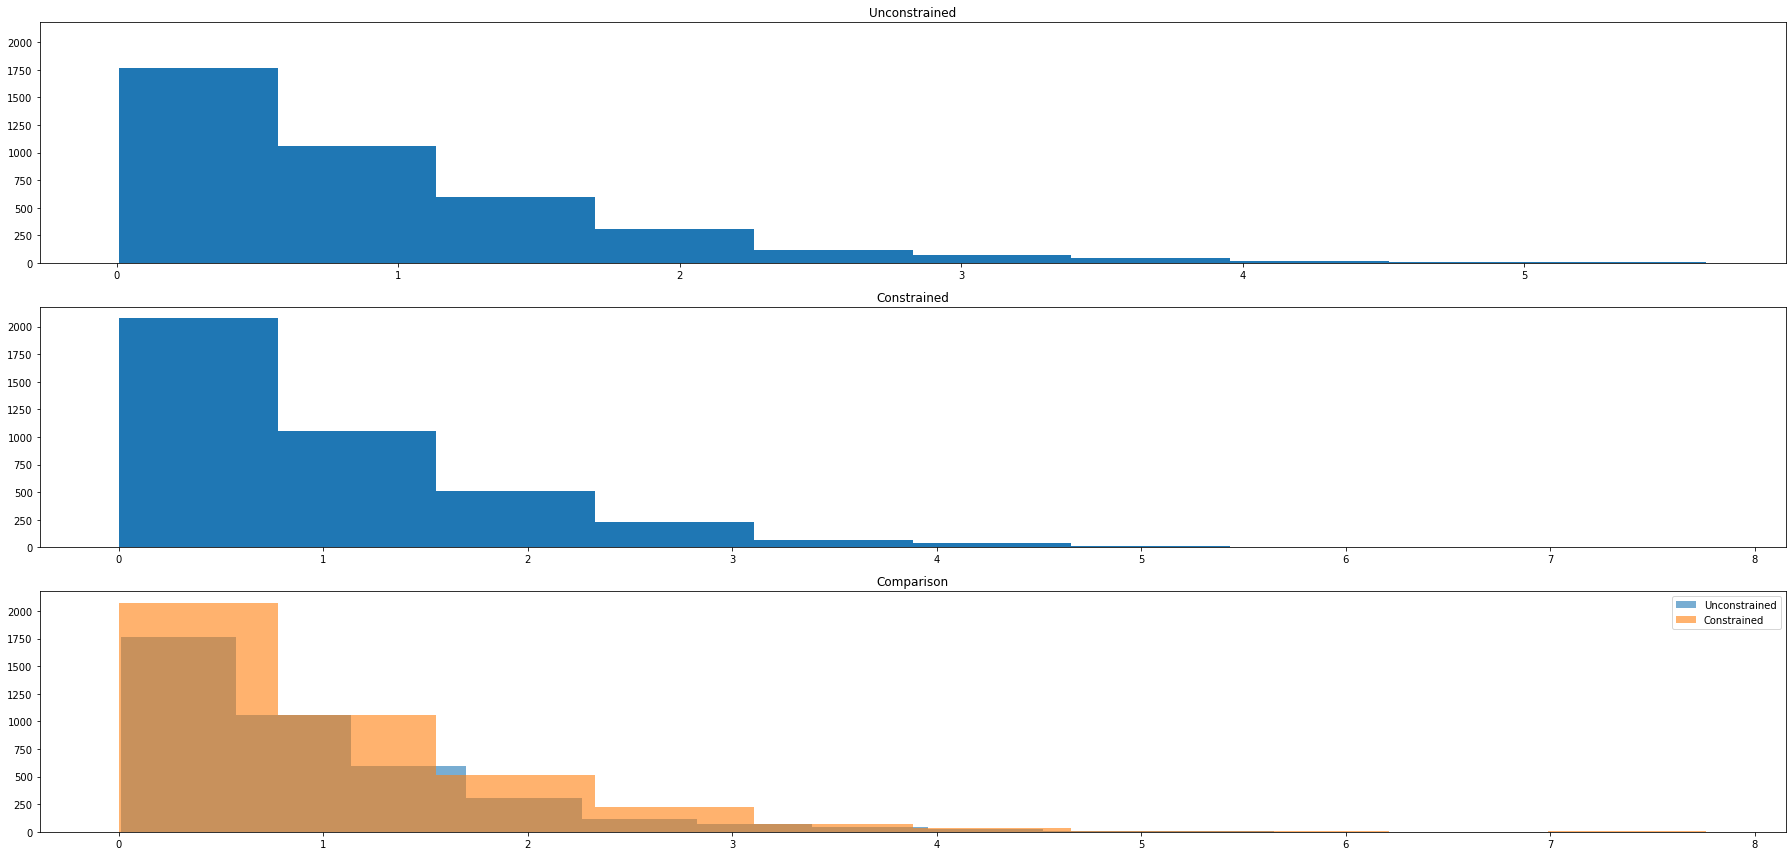

In [4]:
model_4 = cmdstanpy.CmdStanModel(stan_file='Data/code_4.stan')
sample_4 = model_4.sample()
model_5 = cmdstanpy.CmdStanModel(stan_file='Data/code_5.stan')
sample_5 = model_5.sample()

fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
axs[0].hist(sample_4.stan_variable('theta'))
axs[0].set_title('Unconstrained')
axs[1].hist(sample_5.stan_variable('theta'))
axs[1].set_title('Constrained')
axs[2].hist(sample_4.stan_variable('theta'), alpha = 0.6)
axs[2].hist(sample_5.stan_variable('theta'), alpha = 0.6)
axs[2].set_title('Comparison')
axs[2].legend(['Unconstrained','Constrained'])

Excercise 4

In [5]:
model = cmdstanpy.CmdStanModel(stan_file='Data/code_6.stan')
data = {'y_guess': [1],
        'theta': [(F+L)/2]}
sample = model.sample(data)
print(sample.draws_pd()['sigma'])

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



0       2.71757
1       2.71757
2       2.71757
3       2.71757
4       2.71757
         ...   
3995    2.71757
3996    2.71757
3997    2.71757
3998    2.71757
3999    2.71757
Name: sigma, Length: 4000, dtype: float64


Excercise 5

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


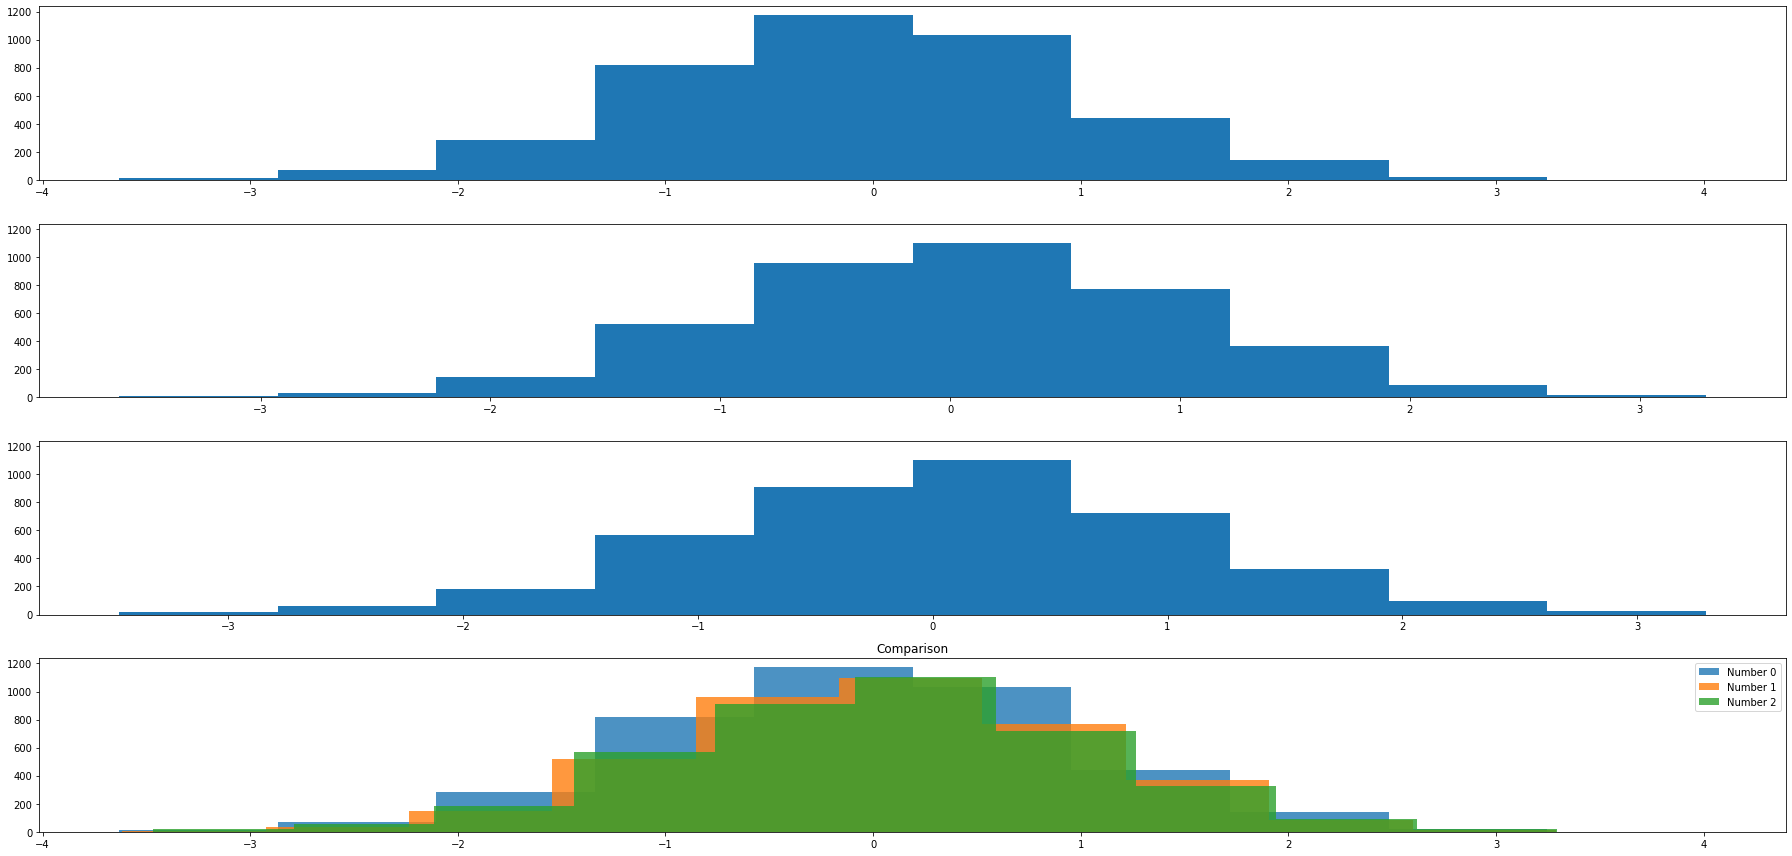

In [6]:
num = 3

models = [cmdstanpy.CmdStanModel(stan_file=f'Data/code_{i+7}.stan') for i in range(num)]
samples = [model.sample({'N': F}) for model in models]

fig, axs = plt.subplots(num+1, 1, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
for i in range(num):
    axs[i].hist(samples[i].stan_variable('theta'))
    axs[num].hist(samples[i].stan_variable('theta'), alpha=0.8)
axs[num].set_title('Comparison')
axs[num].legend([f'Number {i}' for i in range(num)])

Excercise 6

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing


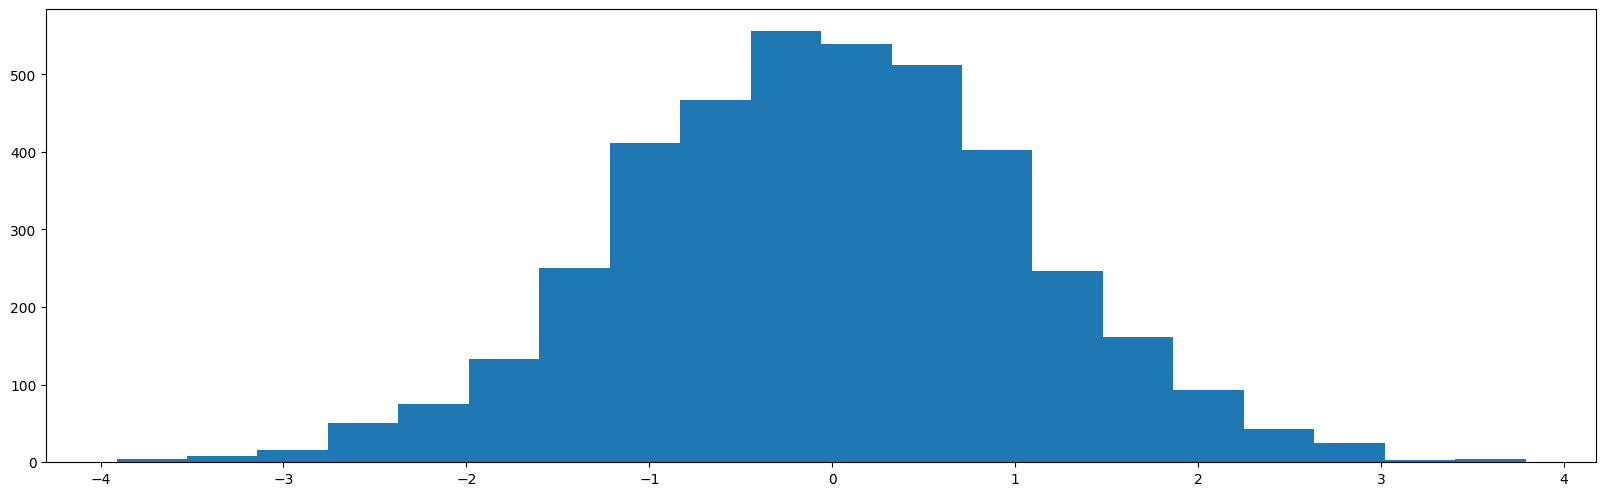

In [7]:
model = cmdstanpy.CmdStanModel(stan_file='Data/code_10.stan')
mean_y = model.generate_quantities(data={'N': F}, mcmc_sample=samples[0])
plt.figure(figsize=(20,6), dpi=100)
plt.hist(mean_y.stan_variable('mean_y'), bins=20)
plt.show()